In [1]:
image_input_size = (80,60,3)

### Importing Dataset

In [2]:
import os 
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
os.getcwd()

'C:\\Users\\Asus\\Desktop\\RAPOR ÖDEV'

In [4]:
os.listdir('./dataset/')

['archive.zip',
 'HAM10000_images',
 'HAM10000_metadata.csv',
 'hmnist_28_28_L.csv',
 'hmnist_28_28_RGB.csv',
 'hmnist_8_8_L.csv',
 'hmnist_8_8_RGB.csv']

In [5]:
metadata = pd.read_csv("./dataset/HAM10000_metadata.csv")

In [6]:
metadata

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [7]:
k = metadata["dx"].value_counts()
k_dict = k.to_dict()

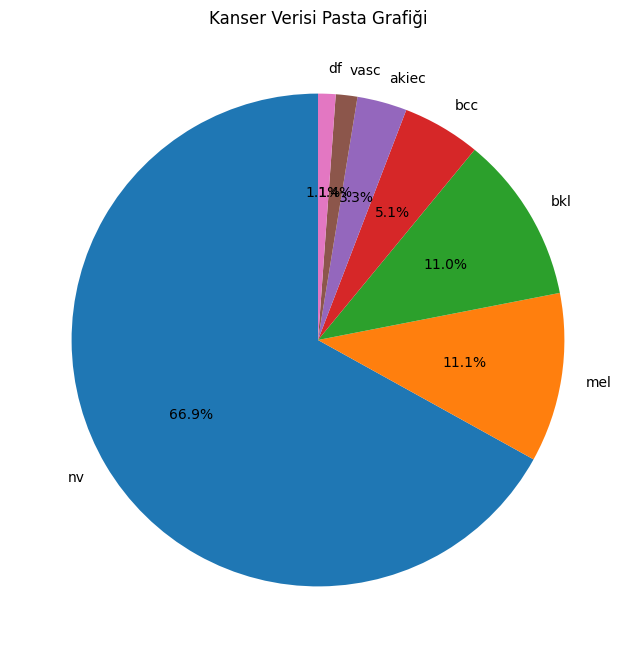

In [8]:
# Pasta grafiğini çizelim
plt.figure(figsize=(8, 8))  # Grafiğin boyutunu ayarla (isteğe bağlı)
plt.pie(k_dict.values(), labels=k_dict.keys(), autopct='%1.1f%%', startangle=90)

# 'autopct' parametresi yüzdelik değerlerini ekler, 'startangle' parametresi başlangıç açısını ayarlar

plt.title('Kanser Verisi Pasta Grafiği')
plt.show()


In [9]:
categories = metadata["dx"]
img_names = metadata["image_id"]
categories = np.array(categories)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(img_names, categories, test_size=0.33, random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(X_train.shape[0] + X_test.shape[0], len(img_names))
print(y_train.shape)
print(y_test.shape)


(6710,)
(3305,)
10015 10015
(6710,)
(3305,)


In [11]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_train_y = encoder.fit_transform(np.reshape(y_train,newshape=(-1,1))).toarray()
encoded_test_y = encoder.fit_transform(np.reshape(y_test,newshape=(-1,1))).toarray()
print(encoded_train_y[0:4])
print(encoded_test_y[0:4])

[[0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]
[[0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]]


In [12]:
train_images =  []
for im_name in X_train:
    im = cv2.imread(f"./dataset/HAM10000_images/{im_name}.jpg")
    im = cv2.resize(im,dsize=(image_input_size[1],image_input_size[0]))
    train_images.append(im)

test_images =  []
for im_name in X_test:
    im = cv2.imread(f"./dataset/HAM10000_images/{im_name}.jpg")
    im = cv2.resize(im,dsize=(image_input_size[1],image_input_size[0]))
    test_images.append(im)
    
print(len(train_images))
print(len(test_images))

6710
3305


In [13]:
train_images = np.array(train_images)
test_images = np.array(test_images)
categories = np.array(categories)
print(train_images.shape,test_images.shape,categories.shape)

(6710, 80, 60, 3) (3305, 80, 60, 3) (10015,)


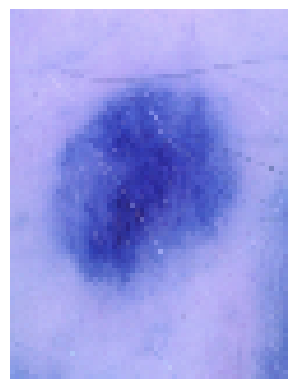

In [14]:
plt.imshow(train_images[5000])
plt.axis("off")
plt.show()

In [15]:
from tensorflow.keras.layers import Dense,Dropout,Input,Conv2D,MaxPooling2D,Flatten
import tensorflow as tf
from tensorflow.keras.models import Sequential


In [16]:
model = Sequential()
model.add(Input(shape=image_input_size))
model.add(Conv2D(20,kernel_size=(3,3),activation="relu", kernel_initializer=tf.keras.initializers.Constant(value=0.1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(20,kernel_size=(3,3),activation="relu", kernel_initializer=tf.keras.initializers.Constant(value=0.1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(20,kernel_size=(3,3),activation="relu", kernel_initializer=tf.keras.initializers.Constant(value=0.1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(7, kernel_initializer='glorot_uniform',activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 58, 20)        560       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 29, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 27, 20)        3620      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 13, 20)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 11, 20)        3620      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 5, 20)         0

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=['accuracy'])

In [21]:
history = model.fit(x=train_images,y=encoded_train_y,epochs=2,)


Epoch 1/2
210/210 [==============================] - 1s 5ms/step - loss: 770.3412 - accuracy: 0.5104
Epoch 2/2
210/210 [==============================] - 1s 5ms/step - loss: 141.9608 - accuracy: 0.5174


In [22]:
test_loss, test_acc = model.evaluate(test_images, encoded_test_y, verbose=2)
print('\nTest accuracy:', test_acc)

104/104 - 0s - loss: 56.9875 - accuracy: 0.4862 - 387ms/epoch - 4ms/step

Test accuracy: 0.4862329661846161


In [30]:
history.history

{'loss': [770.3411865234375, 141.96083068847656],
 'accuracy': [0.5104321837425232, 0.517436683177948]}

In [31]:
from sklearn.metrics import f1_score

In [37]:
# Modelin çıktılarını alın
predictions = model.predict(test_images)

# Çıktıları one-hot encoded'dan sınıflara dönüştürün
binary_predictions = tf.argmax(predictions, axis=1).numpy()
true_labels = tf.argmax(encoded_test_y, axis=1).numpy()

# sklearn ile F1 score'u hesapla
f1 = f1_score(true_labels, binary_predictions, average='weighted')

print("Weighted F1 Score (sklearn):", f1)

104/104 [==============================] - 0s 3ms/step
Weighted F1 Score (sklearn): 0.5013075452053389
